# Título do projeto:
### Análise temporal do uso e ocupação do solo em unidades de conservação na Amazônia brasileira

# Integrantes do grupo:
##### Caio Leandro Alves (Polo Matão/SP); Camila Souza Silva (Polo Formosa/GO); Joelma Regina Soares da Silva (Polo Turvo/PR); Marina de Mendonça Pereira (Polo Formosa/GO); Matheus da Costa Gondim (Polo Matão/SP); Sara Alves dos Santos; Suzan Patrício Andrade e Thalline Rodrigues da Silva (Polo Formosa/GO).


# Polo:

# 1. Justificativa

Em consonância com o Art. 225 da Constituição Federal de 1988, onde está previsto o direito de um meio ambiente ecologicamente equilibrado aos cidadãos, em dezoito de julho de 2000 foi instituído o Sistema Nacional de Unidades de Conservação (SNUC - Lei Federal 9.985/2000), estabelecendo critérios e normas para a criação, implantação e gestão das unidades de conservação (UCs), trazendo dentre seus objetivos, a contribuição para a manutenção da diversidade biológica e dos recursos genéticos, a proteção de espécies ameaçadas de extinção, a contribuição para a preservação e à restauração da diversidade de
ecossistemas naturais, bem como a busca pelo desenvolvimento sustentável a partir dos recursos naturais. Bannach et al. (2014), em alinhamento ao almejado no SNUC, cita que a criação de áreas de preservação é um importante instrumento na garantia da manutenção dos serviços ambientais, que incluem a regulação do clima, preservação da diversidade biológica e também de espécies ameaçadas de extinção. Para garantir a continuidade dessas funções ambientais, torna-se necessário o combate ao desmatamento e ao uso inadequado de áreas
protegidas.

De acordo com Mojica et al. (2022), uma das formas de assegurar proteção e gestão ambiental é pelo monitoramento espaço-temporal, na qual o sensoriamento remoto é ferramenta crucial que baliza a monitorização e seguimento dos fatores que refletem essa transformação. Dias e Figueirôa (2020) mencionam que a utilização de ferramentas e técnicas de geotecnologias auxilia as diversas etapas do planejamento, criação, pesquisa e monitoramento de UCs, influenciando na tomada de decisão pela gestão, bem como dinamiza sua fiscalização e monitoramento. Dall’Igna e Maniesi (2022) demonstraram em seus estudos
sobre a análise espaço-temporal da unidade de conservação Floresta do Jamari, a
possibilidade do uso de ferramentas de geoprocessamento para a qualificação, quantificação e espacialização e análises integradas dos dados georreferenciados de classes de uso do solo da área de estudo e sua zona de amortecimento, evidenciando as alterações dessas classes no
período observado.

Nesse sentido, conhecer as alterações do uso e cobertura do solo nessas áreas pode auxiliar na eficácia do cumprimento e aplicação das leis ambientais, fortalecendo a utilização de geotecnologias aliadas a outros fatores para a busca de detecções cada vez mais precisas, auxiliando na tomada de decisões do Poder Público rumo ao desenvolvimento sustentável.


# 2. Objetivos
O objetivo principal da pesquisa é verificar a alteração do uso e ocupação do solo, por meio do uso de técnicas de sensoriamento remoto, em período a ser definido, evidenciando áreas de desmatamento em UC situada no Bioma Amazônia e em território brasileiro. O objetivo específico é automatizar a identificação destes desmatamentos, via geoprocessamento de imagens e de outros dados oriundos principalmente do INPE e/ou MapBiomas, através da linguagem computacional Python e de outras técnicas suplementares em GIS.


# 3. Método

A pesquisa necessitará de imagens de satélites que sobrepõem as unidades de
conservação (UCs) em diferentes períodos, de dados vetoriais dos limites dessas áreas, bem como de outras informações geoespaciais, como dados oriundos da base cartográfica IBGE, do Prodes, alertas DETER e alertas do MapBiomas.


# 4. Desenvolvimento do projeto

## 4.1 Carregamento dos dados



*   **Imagens de satélite**

O fluxo de trabalho de preparação de dados iniciará com a leitura de imagens corrigidas geometricamente, garantindo a correspondência espacial entre as séries de imagens filtradas.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



*   **Dados vetoriais**

Para a manipulação dos dados vetoriais será necessáio o uso da biblioteca *Geopandas* que adiciona suporte para dados geoespaciais. Também optou-se pelo uso da biblioteca *Geobr* que fornece fácil e rápido acesso para conjuntos de dados oficiais do Brasil.


In [ ]:
# Instalação (se necessário) das bibliotecas
!pip install geopandas geobr

In [ ]:
# Importação das bibliotecas necessárias para a análise
import geopandas as gpd
import geobr
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd

In [ ]:
# Consulta na lista de dados disponíveis no geobr
geobr.list_geobr()

Function: read_country
Geographies available: Country
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_region
Geographies available: Region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_state
Geographies available: States
Years available: 1872, 1900, 1911, 1920, 1933, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_meso_region
Geographies available: Meso region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020
Source: IBGE
------------------------------
Function: read_micro_region
Geographies available: Micro region
Years available: 2000, 2001, 2010, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020

In [ ]:
# Abrindo os limites de Unidades de Conservação (UC)
UC = geobr.read_conservation_units()
UC.head() #Visualização das 5 primeiras linhas para compreender como os atributos estão organizados

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,dt_ultim10,code_u111,name_organization,date,geometry
0,2350,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL BUGIO...,None,Reserva Particular do Patrimônio Natural,US,estadual,2010,6101,Aproximado (O poligono representa uma estimati...,Outros nº 74-S de 22/02/2010,31/08/2012,0000.32.2350,Instituto Estadual de Meio Ambiente e Recursos...,201909.0,"MULTIPOLYGON (((-40.96875 -20.06128, -40.96906..."
1,3787,AREA DE PROTECAO AMBIENTAL DA BACIA DO CORREGO...,None,Área de Proteção Ambiental,US,municipal,2018,15289,Correto (O poligono corresponde ao memorial de...,Decreto nº 051/2018 de 20/09/2018,20/09/2018,1480.52.3787,Secretaria Municipal de Meio Ambiente de Nova ...,201909.0,"MULTIPOLYGON (((-48.25389 -18.04416, -48.2564 ..."
2,3445,RESERVA PARTICULAR DO PATRIMÔNIO NATURAL PILAR,None,Reserva Particular do Patrimônio Natural,US,estadual,2013,13500,Correto (O poligono corresponde ao memorial de...,Portaria nº 466 de 27/06/2013,10/07/2017,0000.33.3445,Instituto Estadual do Ambiente do Rio de Janeiro,201909.0,"MULTIPOLYGON (((-42.79637 -22.86341, -42.79632..."
3,145,PARQUE NACIONAL DA SERRA DA CAPIVARA,64,Parque,PI,federal,1979,6506,Aproximado (O poligono representa uma estimati...,Decreto nº 83548 de 05/06/1979,27/09/2007,0000.00.0145,Instituto Chico Mendes de Conservação da Biodi...,201909.0,"MULTIPOLYGON (((-42.57484 -8.57399, -42.57355 ..."
4,1754,FLORESTA ESTADUAL DO ARAGUAIA,None,Floresta,US,estadual,2002,2983,Correto (O poligono corresponde ao memorial de...,Decreto nº 5.630 de 07/08/2002,06/08/2009,0000.52.1754,Secretaria Estadual do Meio Ambiente e dos Rec...,201909.0,"MULTIPOLYGON (((-50.58059 -13.21449, -50.57208..."


Obs: Previamente foi realizado o upload dos dados de alertas de desmatamento no Drive.

In [ ]:
# Abrindo os arquivos de alertas de desmatamento (INPE) salvos no Drive:
Defor_2007 = gpd.read_file('/content/drive/MyDrive/files/tcc/accumulated_deforestation_2007/accumulated_deforestation_2007.shp') # Desmatamento acumulado até 2007
deter_amz = gpd.read_file('/content/drive/MyDrive/files/tcc/deter-amz-public-2024nov21/deter-amz-deter-public.shp') # Alertas Deter


## 4.2 Preparação dos dados



*   **Imagens de satélite**

Para o pré-processamento das imagens, a plataforma *Google Earth Engine* (GEE) será utilizada por meio da aplicação de funções específicas de processamento, como também a linguagem de programação Python, através da janela do editor de código em Qgis. Nesse sentido, será possível digitar as funções que permitem utilizar as ferramentas de geoprocessamento com dados de entrada, tipo raster ou vetor, o que fornece uma rápida e eficiente implantação dos métodos de detecção de mudanças.

Para a filtragem de bandas será utilizada a função *“filterBounds*()”, correspondentes a área de interesse, como também será um arquivo shapefile que define os limites das unidades de conservação de interesse. Em seguida, serão criados compostos temporais de refletância de superfície (SR) a fim de gerar uma imagem individual que representa a tendência central de toda a série temporal. Para obter a mediana da série temporal das imagens é aplicado ao ‘dataset’ a função *“Statistical median”*. Além disso, aplicou-se a função *‘expression’* em GEE para multiplicar e totalizar os valores de cada uma das bandas, sendo a expressão estatística que permitiu realizar a combinação linear.

Para elaborar o algoritmo de mudança de cobertura será utilizado a linguagem de programação python. Para tanto, com o objetivo de identificar as imagens transformadas, serão criados objetos das datas de entrada do método de detecção: “data1”, “data2”, “data3”, “data4”. Em seguida, será definida a função *“Float*()”, para extrair os valores decimais que contém os pixels da imagem.




In [ ]:
# Exemplo de código que será utilizado para definição de dados de entrada no CVA:
#ldata1 = Float('luminosidade20XX.tif')
#vdata1 = Float('verdor20XX.tif')
#ldata2 = Float('luminosidade20XY.tif')
#vdata2 = Float('verdor20XY.tif')


Para o cálculo da mudança será executada a função matemática *“SquareRoot”*, além de preencher os parâmetros definidos para o cálculo da distância euclidiana, como também serão utilizadas as variações espectrais obtidas no passo anterior como dados de entrada.


In [ ]:
# Exemplo de código que será utilizado para cálculo Magnitude de mudança:
# cix = ldata2 - ldata1
# ciy = vdata2 - vdata1
# IntensidadeMudanca = SquareRoot (Power(cix, 2) + Power(ciy, 2))

Após a criação das variações espectrais entre as duas datas, será importado o módulo *“import math”* para executar operações trigonométricas. Por fim o código *“save”*, permite especificar os parâmetros de saída das imagens, fazendo o download das camadas computadas no ambiente local de trabalho do notebook.


In [ ]:
# Exemplo de código que será utilizado para cálculo Direção de mudança:
# import math
# DirecaoMudanca = ATan2 (ciy,cix) * 360.0 / math.pi
# output_path = ("")
# DirecaoMudanca.save(output_path)
# MagnitudeMudanca.save(output_path)



*   **Dados vetoriais**

In [ ]:
# Verificação e ajuste do CRS
if UC.crs != Defor_2007.crs:
    Defor_2007 = Defor_2007.to_crs(UC.crs)

if UC.crs != deter_amz.crs:
    deter_amz = deter_amz.to_crs(UC.crs)

UC.crs == Defor_2007.crs == deter_amz.crs

True

As UCs alvos deste estudo serão e seus respectivos Cadastros Nacional de Unidades de Conservação (CNUC):
*   Área de Proteção Ambiental do Tapajós (0000.00.0268);
*   Floresta Nacional do Jamanxim (0000.00.0266);
*   Floresta Nacional de Altamira (0000.00.0083); e
*   Reserva Biológica Nascentes da Serra do Cachimbo (0000.00.0216).


<Axes: >

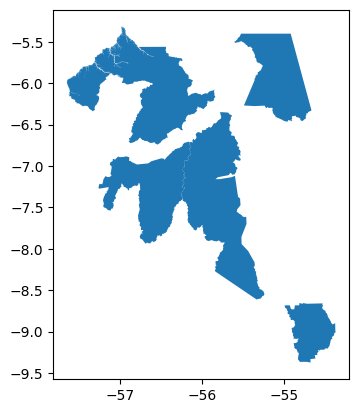

In [ ]:
# Filtro das UCs de interesse
CNUC_filtro = ['0000.00.0268', '0000.00.0266', '0000.00.0083', '0000.00.0216']
UC_PA = UC[UC['code_u111'].isin(CNUC_filtro)]
UC_PA.plot()

Optou-se pelo o uso de CNUC no filtro por ser uma chave única para cada unidade e, portanto, útil para localizar registros específicos.

## 4.3 Realização de análises e visualização dos resultados



*   **Imagens de satélite**

Os resultados dos compostos das datas selecionadas serão criados a partir dos meses com menos chuva para as áreas selecionadas, o que reduz os efeitos atmosféricos. A composição colorida RGB 5-8-4 (vermelho, infravermelho próximo, verde), permitirá diferenciar a vegetação saudável na cor verde, em relação a outro tipo de cobertura da terra como: solo exposto e água com tom roxo.



*   **Dados vetoriais**

Os alertas de desmatamento serão utilizados como indicativos para localização da área desmatadas e, subsequente, refinamento do polígono. E será gerado através dos seguintes passos:

1.   Intersecção dos alertas com os limites das UCs alvos
2.   Salvamento do dado vetorial gerado com a intersecção
3.   Geração de mapa para a visualização da localização dos indicativos dentro das UCs.

<Axes: >

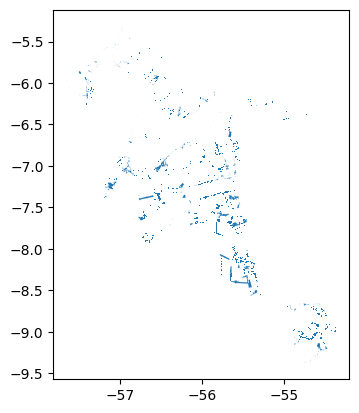

In [ ]:
# Filtrando os dados acumulados até 2007 para as UCs de interesse
Defor_UC = gpd.overlay(UC_PA, Defor_2007, how='intersection')
Defor_UC.plot()

<ipython-input-90-6a53b25feab3>:2: UserWarning: `keep_geom_type=True` in overlay resulted in 7 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  deter_amz_UC = gpd.overlay(UC_PA, deter_amz, how='intersection')


<Axes: >

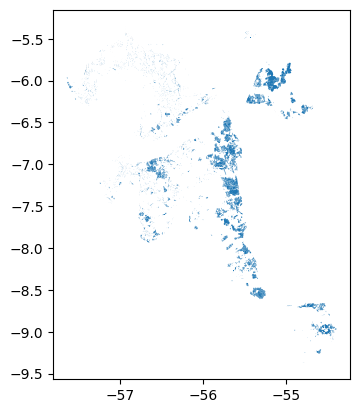

In [ ]:
# Filtrando os dados Deter para as UCs de interesse
deter_amz_UC = gpd.overlay(UC_PA, deter_amz, how='intersection')
deter_amz_UC.plot()

In [ ]:
# Salvar shapefiles filtrados dentro do drive
import os

# Verifica se a pasta existe. Se não, cria a pasta
output_folder = 'arquivo_final'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

Defor_UC.to_file('arquivo_final/accumulated_deforestation_2007_PA.shp')
deter_amz_UC.to_file('arquivo_final/deter-amz-deter-public_PA.shp')

<ipython-input-91-09175c0cd365>:9: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  Defor_UC.to_file('arquivo_final/accumulated_deforestation_2007_PA.shp')
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'code_conservation_unit' to 'code_conse'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'name_conservation_unit' to 'name_conse'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'government_level' to 'government'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'creation_year' to 'creation_y'
  ogr_write(
/usr/local/lib/python3.10/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'legislation' to 'legislatio'
  ogr_write(
/u

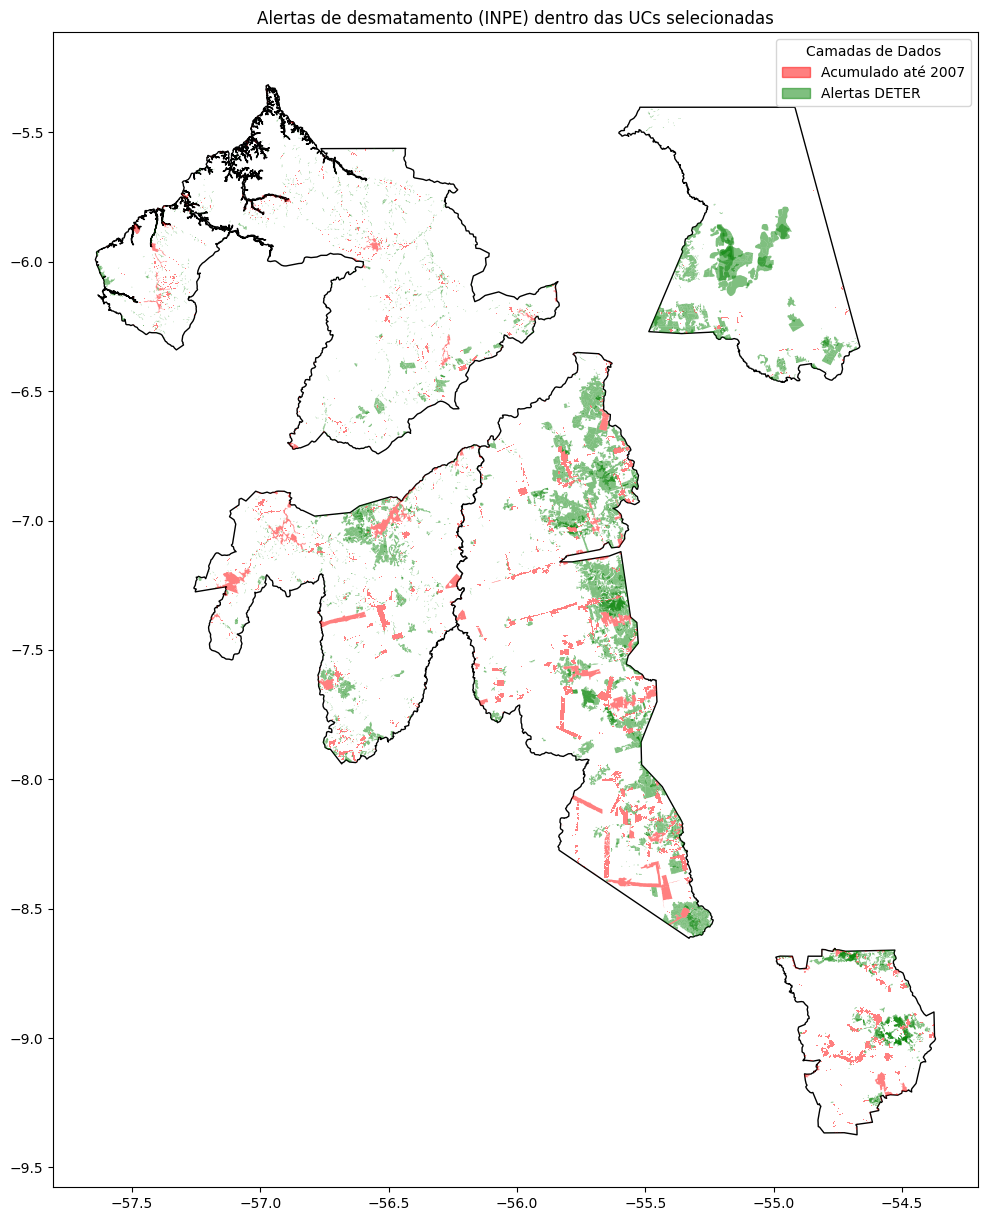

In [ ]:
# Mapa final
# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(15, 15))

# Plotar a base das UCs
UC_PA.plot(ax=ax, color='white', edgecolor='black')

# Plotar as camadas de alertas
Defor_UC.plot(ax=ax, color='red', alpha=0.5)
deter_amz_UC.plot(ax=ax, color='green', alpha=0.5)

# Título do mapa
ax.set_title('Alertas de desmatamento (INPE) dentro das UCs selecionadas')

# Criar manualmente os elementos da legenda
red_patch = mpatches.Patch(color='red', alpha=0.5, label='Acumulado até 2007')
green_patch = mpatches.Patch(color='green', alpha=0.5, label='Alertas DETER')

# Adicionar a legenda ao eixo
ax.legend(handles=[red_patch, green_patch], loc='upper right', title='Camadas de Dados')

# Mostrar o gráfico
plt.show()

In [ ]:
#Verificação da tabela dos dados acumulados após a intersecção
Defor_UC.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,...,julian_day,image_date,year,area_km,scene_id,source,satellite,sensor,uuid,geometry
0,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,0.0,NaT,2007.0,0.010628,0.0,None,None,None,898330d3-75f4-45c8-90dc-070202d03f57,"POLYGON ((-55.03971 -6.15577, -55.03971 -6.156..."
1,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,0.0,NaT,2007.0,0.064621,0.0,None,None,None,ab230fae-a90f-446d-9a21-727797053544,"POLYGON ((-54.99533 -6.43983, -54.99533 -6.440..."
2,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,0.0,NaT,2007.0,0.119546,0.0,None,None,None,fa8dee55-41ef-4d38-ba9c-fbf8e9794da7,"POLYGON ((-55.01039 -6.43929, -55.01039 -6.439..."
3,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,0.0,NaT,2007.0,0.021281,0.0,None,None,None,fc87964b-7beb-4480-8302-9efd4e1db2c0,"POLYGON ((-55.57314 -5.50452, -55.57314 -5.505..."
4,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,0.0,NaT,2007.0,0.017714,0.0,None,None,None,1dc2507b-a833-4158-91c8-53841bc2b0ab,"POLYGON ((-55.03971 -6.15469, -55.03917 -6.154..."


In [ ]:
#Descartar colunas desnecessárias do dado acumulado
DeforUC_table = Defor_UC.drop(columns=['id_wcm','category','group','government_level','creation_year','gid7','quality','legislation','dt_ultim10','code_u111', 'name_organization', 'date', 'fid','state','path_row','class_name', 'def_cloud','julian_day','image_date','scene_id','source','satellite','sensor','uuid'])
DeforUC_table['year'] = DeforUC_table['year'].astype(int) #Transformar os dados da coluna Year em números inteiros
DeforUC_table

,code_conservation_unit,name_conservation_unit,main_class,year,area_km,geometry
0,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.010628,"POLYGON ((-55.03971 -6.15577, -55.03971 -6.156..."
1,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.064621,"POLYGON ((-54.99533 -6.43983, -54.99533 -6.440..."
2,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.119546,"POLYGON ((-55.01039 -6.43929, -55.01039 -6.439..."
3,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.021281,"POLYGON ((-55.57314 -5.50452, -55.57314 -5.505..."
4,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.017714,"POLYGON ((-55.03971 -6.15469, -55.03917 -6.154..."
...,...,...,...,...,...,...
2120,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO,2007,0.037008,"POLYGON ((-55.4034 -8.5157, -55.4034 -8.51624,..."
2121,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO,2007,0.000091,"POLYGON ((-55.86689 -6.97996, -55.86689 -6.979..."
2122,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO,2007,30.078686,"POLYGON ((-55.65185 -7.65703, -55.65131 -7.657..."
2123,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO,2007,0.077703,"POLYGON ((-55.95808 -7.64468, -55.95808 -7.645..."


In [ ]:
#Verificação da tabela dos dados Deter após a intersecção
deter_amz_UC.head()

,code_conservation_unit,name_conservation_unit,id_wcm,category,group,government_level,creation_year,gid7,quality,legislation,...,VIEW_DATE,SENSOR,SATELLITE,AREAUCKM,UC,AREAMUNKM,MUNICIPALI,GEOCODIBGE,UF,geometry
0,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,2024-10-06,WFI,AMAZONIA-1,0.619361,FLORESTA NACIONAL DE ALTAMIRA,0.619361,Altamira,1500602,PA,"POLYGON ((-54.76724 -6.32126, -54.76724 -6.320..."
1,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,2024-10-06,WFI,AMAZONIA-1,0.316859,FLORESTA NACIONAL DE ALTAMIRA,0.316859,Altamira,1500602,PA,"POLYGON ((-55.29635 -6.171, -55.29635 -6.17069..."
2,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,2024-10-06,WFI,AMAZONIA-1,0.005587,FLORESTA NACIONAL DE ALTAMIRA,0.005587,Itaituba,1503606,PA,"POLYGON ((-55.29635 -6.17163, -55.29635 -6.171..."
3,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,2024-10-06,WFI,AMAZONIA-1,0.000000,None,0.580321,Altamira,1500602,PA,"MULTIPOLYGON (((-55.12162 -6.3747, -55.1216 -6..."
4,83,FLORESTA NACIONAL ALTAMIRA,198359,Floresta,US,federal,1998,119,Aproximado (O poligono representa uma estimati...,Decreto nº 2483 de 03/02/1998,...,2024-10-06,WFI,AMAZONIA-1,0.011647,FLORESTA NACIONAL DE ALTAMIRA,0.011647,Altamira,1500602,PA,"POLYGON ((-55.12264 -6.37362, -55.12267 -6.373..."


In [ ]:
#Descartar colunas desnecessárias do dado acumulado
deter_amzUC_table = deter_amz_UC.drop(columns=['id_wcm','category','group','government_level','creation_year','gid7','quality','legislation','dt_ultim10','code_u111', 'name_organization', 'date', 'FID', 'QUADRANT', 'PATH_ROW', 'SENSOR', 'SATELLITE','AREAUCKM', 'UC','MUNICIPALI','GEOCODIBGE','UF'])
deter_amzUC_table

,code_conservation_unit,name_conservation_unit,CLASSNAME,VIEW_DATE,AREAMUNKM,geometry
0,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,2024-10-06,0.619361,"POLYGON ((-54.76724 -6.32126, -54.76724 -6.320..."
1,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,2024-10-06,0.316859,"POLYGON ((-55.29635 -6.171, -55.29635 -6.17069..."
2,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,2024-10-06,0.005587,"POLYGON ((-55.29635 -6.17163, -55.29635 -6.171..."
3,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,2024-10-06,0.580321,"MULTIPOLYGON (((-55.12162 -6.3747, -55.1216 -6..."
4,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,2024-10-06,0.011647,"POLYGON ((-55.12264 -6.37362, -55.12267 -6.373..."
...,...,...,...,...,...,...
9066,266,FLORESTA NACIONAL DO JAMANXIM,CICATRIZ_DE_QUEIMADA,2024-09-26,0.406707,"POLYGON ((-55.47666 -7.7548, -55.47707 -7.7550..."
9067,266,FLORESTA NACIONAL DO JAMANXIM,CICATRIZ_DE_QUEIMADA,2024-09-26,0.413582,"POLYGON ((-55.48265 -7.74988, -55.48265 -7.749..."
9068,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO_CR,2018-05-30,0.084836,"POLYGON ((-55.70662 -6.92369, -55.70458 -6.926..."
9069,266,FLORESTA NACIONAL DO JAMANXIM,MINERACAO,2018-05-30,0.086811,"POLYGON ((-55.69818 -6.41841, -55.70115 -6.416..."


In [ ]:
#Organização e formatação da tabela Deter
deter_amzUC_table.rename(columns={'CLASSNAME':'main_class', 'AREAMUNKM':'area_km'}, inplace=True)
deter_amzUC_table['year'] = pd.to_datetime(deter_amzUC_table['VIEW_DATE']).dt.year
deterUC_table = deter_amzUC_table.drop(columns=['VIEW_DATE'])
deterUC_table


,code_conservation_unit,name_conservation_unit,main_class,area_km,geometry,year
0,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,0.619361,"POLYGON ((-54.76724 -6.32126, -54.76724 -6.320...",2024
1,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,0.316859,"POLYGON ((-55.29635 -6.171, -55.29635 -6.17069...",2024
2,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,0.005587,"POLYGON ((-55.29635 -6.17163, -55.29635 -6.171...",2024
3,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,0.580321,"MULTIPOLYGON (((-55.12162 -6.3747, -55.1216 -6...",2024
4,83,FLORESTA NACIONAL ALTAMIRA,CICATRIZ_DE_QUEIMADA,0.011647,"POLYGON ((-55.12264 -6.37362, -55.12267 -6.373...",2024
...,...,...,...,...,...,...
9066,266,FLORESTA NACIONAL DO JAMANXIM,CICATRIZ_DE_QUEIMADA,0.406707,"POLYGON ((-55.47666 -7.7548, -55.47707 -7.7550...",2024
9067,266,FLORESTA NACIONAL DO JAMANXIM,CICATRIZ_DE_QUEIMADA,0.413582,"POLYGON ((-55.48265 -7.74988, -55.48265 -7.749...",2024
9068,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO_CR,0.084836,"POLYGON ((-55.70662 -6.92369, -55.70458 -6.926...",2018
9069,266,FLORESTA NACIONAL DO JAMANXIM,MINERACAO,0.086811,"POLYGON ((-55.69818 -6.41841, -55.70115 -6.416...",2018


In [ ]:
#União/Combinação das duas tabelas
Deter_total=pd.concat([DeforUC_table,deterUC_table])
Deter_total

,code_conservation_unit,name_conservation_unit,main_class,year,area_km,geometry
0,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.010628,"POLYGON ((-55.03971 -6.15577, -55.03971 -6.156..."
1,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.064621,"POLYGON ((-54.99533 -6.43983, -54.99533 -6.440..."
2,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.119546,"POLYGON ((-55.01039 -6.43929, -55.01039 -6.439..."
3,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.021281,"POLYGON ((-55.57314 -5.50452, -55.57314 -5.505..."
4,83,FLORESTA NACIONAL ALTAMIRA,DESMATAMENTO,2007,0.017714,"POLYGON ((-55.03971 -6.15469, -55.03917 -6.154..."
...,...,...,...,...,...,...
9066,266,FLORESTA NACIONAL DO JAMANXIM,CICATRIZ_DE_QUEIMADA,2024,0.406707,"POLYGON ((-55.47666 -7.7548, -55.47707 -7.7550..."
9067,266,FLORESTA NACIONAL DO JAMANXIM,CICATRIZ_DE_QUEIMADA,2024,0.413582,"POLYGON ((-55.48265 -7.74988, -55.48265 -7.749..."
9068,266,FLORESTA NACIONAL DO JAMANXIM,DESMATAMENTO_CR,2018,0.084836,"POLYGON ((-55.70662 -6.92369, -55.70458 -6.926..."
9069,266,FLORESTA NACIONAL DO JAMANXIM,MINERACAO,2018,0.086811,"POLYGON ((-55.69818 -6.41841, -55.70115 -6.416..."


In [ ]:
#Agrupar os dados por ano. Lembrando que os dados referentes a 2007 trata-se de um acumulado
Deter_ano = Deter_total.groupby(['year']).sum('area_km')
Deter_ano

,area_km
year,
2007,4714.028397
2016,55.261159
2017,144.913734
2018,225.317189
2019,483.605099
2020,543.840481
2021,454.860554
2022,579.677315
2023,189.996297


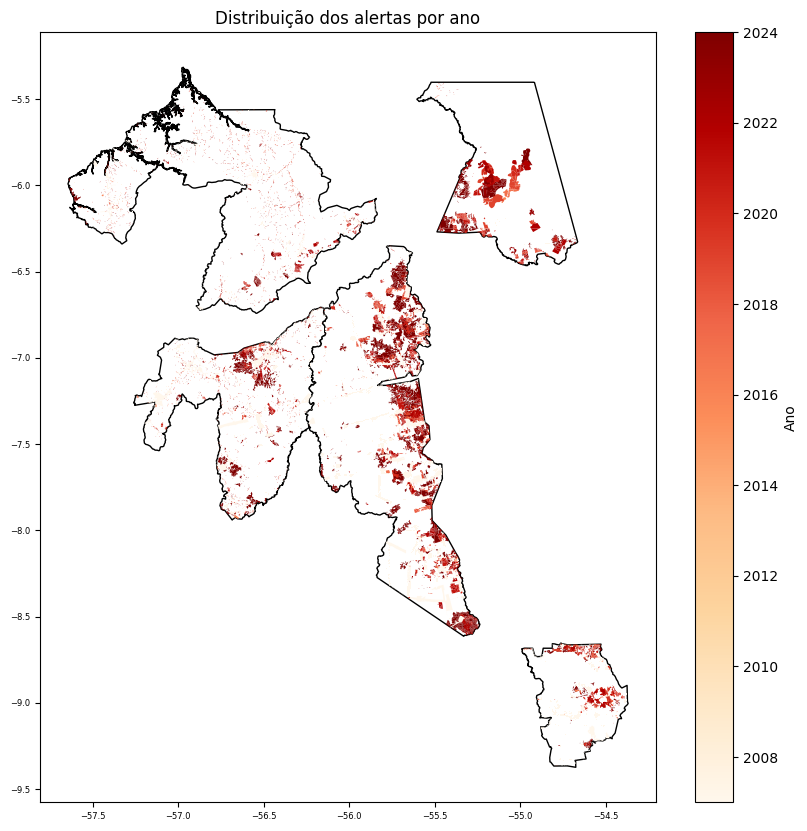

In [ ]:
#Mapa coroplético dos alertas ao longo dos anos

# Definir o tamanho da figura
fig, ax = plt.subplots(figsize=(10, 10))

# Plotar a base das UCs
UC_PA.plot(ax=ax, color='white', edgecolor='black')

# Criar o mapa
Deter_total.plot(
    ax=ax,
    column='year',
    legend=True,
    legend_kwds={'label': 'Ano','orientation':'vertical'},
    cmap='OrRd')

# Ajustar o tamanho do texto dos eixos de coordenadas
ax.tick_params(axis='both', which='major', labelsize=6)

# Adicionar título e exibindo o mapa
ax.set_title('Distribuição dos alertas por ano')
plt.show()

# 5. Conclusão ou considerações finais

À priori, cabe salientar que dentre as Unidades de Conservação selecionadas para este estudo, três delas estão inclusas no grupo de "Uso Sustentável" (Área de Proteção do Tapajós, Floresta Nacional do Jamanxim e Floresta Nacional de Altamira), cujo objetivo seria compatibilizar a conservação da natureza com a utilização dos recursos naturais. Já a UC Reserva Biológica Nascentes da Serra do Cachimbo está inclusa no grupo de "Proteção Integral", onde tal área, afora exceções legais, deveria ser integralmente preservada, sem uso direto de seus recursos. Entretanto, em análise aos dados, independente das causas ("main_class"), é evidente a extensão do dano ambiental em áreas que deveriam ser preservadas ou conservadas, o ininterrupto da avanço do desflorestamento com acentuação entre os anos de 2019 a 2022 e o grave dano apontado para o ano de 2024. O maior incremento verificado no período 2019-2022 provavelmente está relacionado as Políticas Públicas Federais (oriundas do governo anterior) ligadas ao Meio Ambiente e ao desmonte de órgãos de fiscalização ambiental, o que gerou a percepção de impunidade e estimulou o desflorestamento. Quanto ao dano verificado em 2024 (até a data de levantamento dos dados), este está atrelado principalmente a ocorrência de fogo, informação exaustivamente noticiada e resultante das mudanças climáticas e de ações indiretas ou diretas de infratores legais. Assim, considera-se que a preservação e conservação devem avançar rumo ao desenvolvimento sustentável, aliando-se a legislação ambiental com Políticas Públicas contínuas e indissociáveis dos discursos do diferentes governantes ou representantes políticos, de forma que a governança cumpra os compromisso constitucional de garantia de um meio ambiente ecologicamente equilibrados a todos os brasileiros, bem como atinja as metas e os 17 Objetivos do Desenvolvimento Sustentável (ODSs) previstos na Agenda 2030 (compromisso internacional do qual o Brasil é signatário).  

# Referências bibliográficas

BANNACH, Mariáh Pereira; BELTRÃO, Norma Ely Santos; RÊGO, Manoel Cristino do,
MAUÉS FILHO, Paulo da Costa. Desmatamento em Unidade de Conservação no estado do
Pará: uma análise dos anos de 2012 e 2013.In: **Simpósio de Estudos e Pesquisas em
Ciências Ambientais na Amazônia**, 3, 2014, Belém, PA, p.77 a 86, ISSN 2316-7637, 2014.

BRASIL. Constituição (1988). *Constituição da República Federativa do Brasil*. Brasília, DF:
Senado Federal, 1988.

BRASIL. Lei nº 9.985, de 18 de julho de 2000. *Institui o Sistema Nacional de Unidades de Conservação da Natureza e dá outras providências*. Diário Oficial da União, Brasília, DF, 19
jul. 2000. Seção 1, p. 1.

DALL'IGNA, Fernando & MANIESI, Vanderlei. Mudanças espaço-temporal no uso e
cobertura do solo em unidade de conservação de corredor ecológico amazônico: o caso da
intensa pressão antrópica na floresta nacional do Jamari (RO). **Revista Ibero Americana de Ciências Ambientais**, v.13, n.4, p.223-231, 2022. DOI: http://doi.org/10.6008/CBPC2179-
6858.2022.004.0019.

DIAS, Natália Oliveira & FIGUEIRÔA, Carlos Frederico Baumgratz. Potencialidades do uso
de geotecnologias para a gestão e planejamento de Unidades de Conservação. **Revista de Geografia**. Juiz de Fora, MG, v. 10, n. 2, p. 283-302, 2020, ISSN: 2236-837X.
MOJICA, Jack Endrick Pastrana; CASTRO, Lidia Gomes de. SANTOS, Jader de Oliveira.

Detecção de mudanças na cobertura da terra através da implementação do algoritmo *Change Vector Analysis* (CVA) no Parque Estadual do Cocó - Fortaleza/CE. **Revista da Casa da Geografia de Sobral**, Sobral,CE, v. 24, p. 504-531, dez. 2022,
https://doi.org/10.35701/rcgs.v24.887.